# Web Mining Project - Team 1
## Hate Speech and offensive language detection

# Reading and exploring the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%ls

drive/  sample_data/


In [3]:
%cd '/content/drive/MyDrive/web_mining_project'

/content/drive/MyDrive/web_mining_project


In [4]:
%ls

 dataset/               results/   train.csv                  web-mining-project.ipynb
'Project Report.gdoc'   test.csv   web-mining-llm-gpu.ipynb   wrong_preds.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10, 7)

In [6]:
# reading the dataset
data_ = pd.read_csv('dataset/labeled_data.csv')
data = data_.iloc[:, 1:].copy()
data.head(10)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [7]:
# saving 50 sample for submission
data.sample(n=50).to_csv('dataset_sample.csv', index=False)

## Exploring the data

### Shape of the data and data types

In [ ]:
# number of records and features
data.shape

(24783, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


### Checking for missing and duplicate values

In [ ]:
# checking for missing values
data.isnull().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
# checking for duplicate values
any(data.duplicated())

False

### Number for classes and their distribution

In [ ]:
# class distribution
data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [ ]:
# mapping the class to their labels
data['labels'] = data['class'].map({0: 'hate_speech', 1: 'offensive_language', 2: 'neither'})

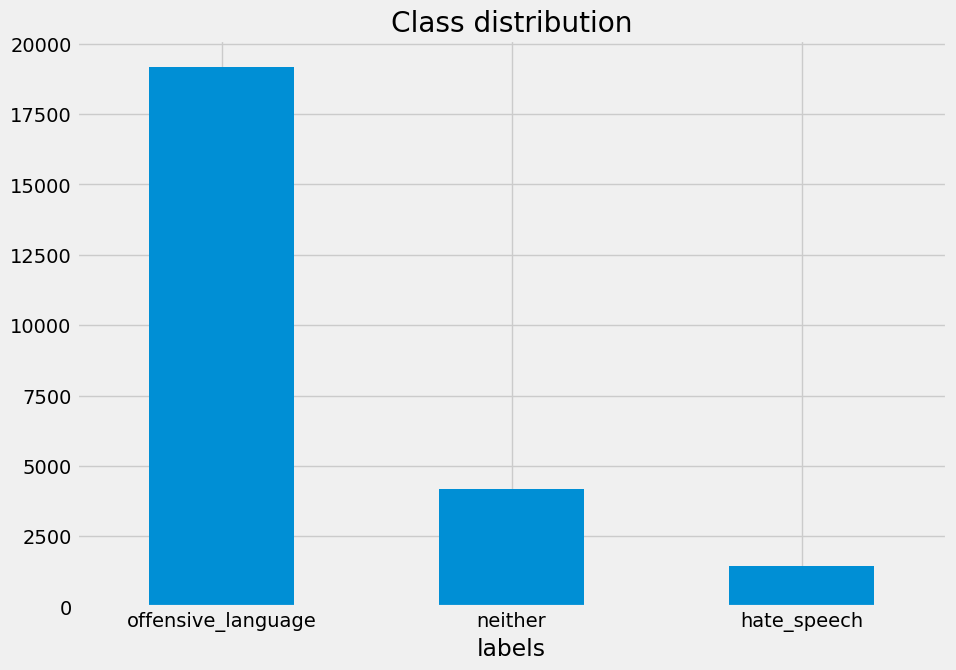

In [ ]:
# plotting the class distribution
data['labels'].value_counts().plot(kind='bar', rot=0, title='Class distribution');

### Visualizing random data and labels

In [ ]:
# visualizing data sample
sample_data = data.sample(n=10)
for i, row in sample_data.iterrows():
  print(f"LABEL: {row['labels']}\nTEXT: {row['tweet']}\n{'---'*50}\n\n")

LABEL: offensive_language
TEXT: Millions of niggas can rap. Can any of y'all make music? Like a quality song. Not just you spittin bars. Shit you can play wit the bitches?
------------------------------------------------------------------------------------------------------------------------------------------------------


LABEL: offensive_language
TEXT: If you don't know what yo bitch doing tuat ain't you bitch, Im just sayin.
------------------------------------------------------------------------------------------------------------------------------------------------------


LABEL: hate_speech
TEXT: @maggie_burdis @nickgoldapp lmao dude you are probably the biggest fag in nebraska &#128514;&#128514;&#128514;&#128514;&#128514;
------------------------------------------------------------------------------------------------------------------------------------------------------


LABEL: neither
TEXT: @hayyllss Merry Christmas Hun ! &#127877;&#127876;&#10084;&#65039;
--------------------

### Visualizing the detailed distribution of each class

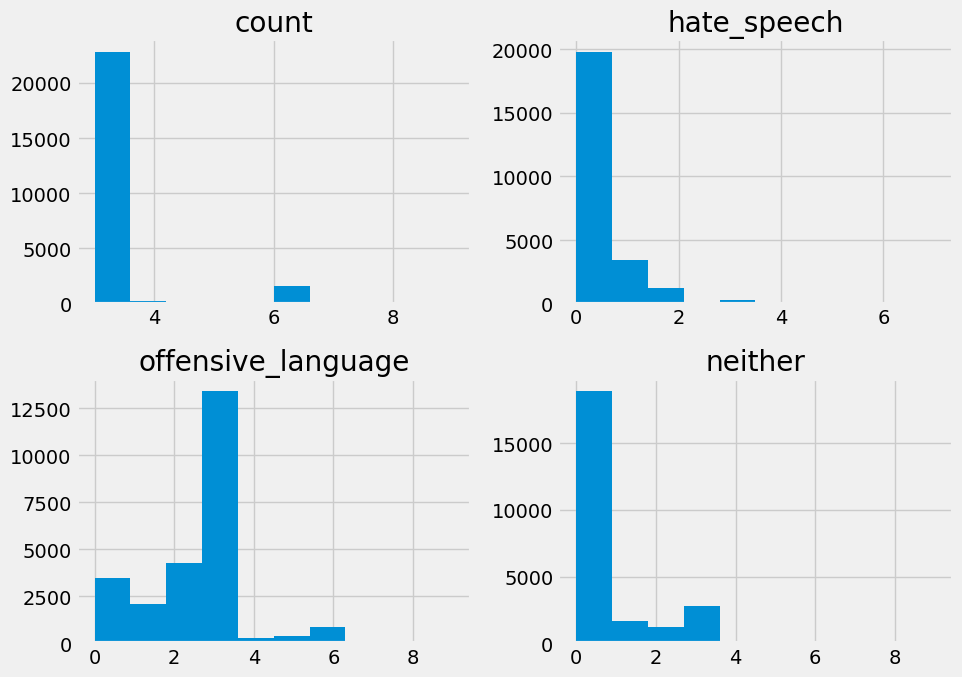

In [ ]:
plt.figure()
for i, col in enumerate(data.columns[:-3]):
  plt.subplot(2, 2, i+1)
  plt.tight_layout()
  plt.title(col)
  plt.hist(data[col])

## Word count Analysis

In [ ]:
# Word count
data['word_count'] = data['tweet'].apply(lambda x: len(str(x).split()))
print("\nWord count statistics:")
print(data['word_count'].describe())


Word count statistics:
count    24783.000000
mean        14.117016
std          6.825525
min          1.000000
25%          9.000000
50%         13.000000
75%         19.000000
max         52.000000
Name: word_count, dtype: float64


### Plotting the distribution of word count

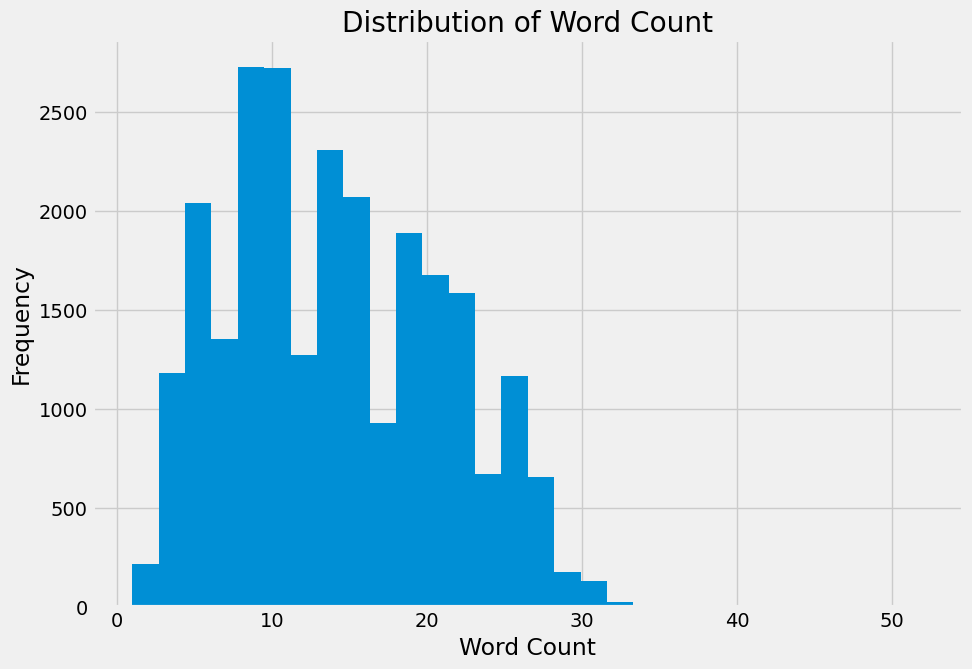

In [ ]:
# Plot distribution of word count
plt.figure()
plt.hist(data['word_count'], bins=30)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency');

### Number of unique words

In [ ]:
# Unique word analysis
data['unique_words'] = data['tweet'].apply(lambda x: len(set(str(x).split())))
print("\nUnique word count statistics:")
print(data['unique_words'].describe())


Unique word count statistics:
count    24783.000000
mean        13.447928
std          6.226181
min          1.000000
25%          8.000000
50%         13.000000
75%         18.000000
max         33.000000
Name: unique_words, dtype: float64


### Distribution of unique word count

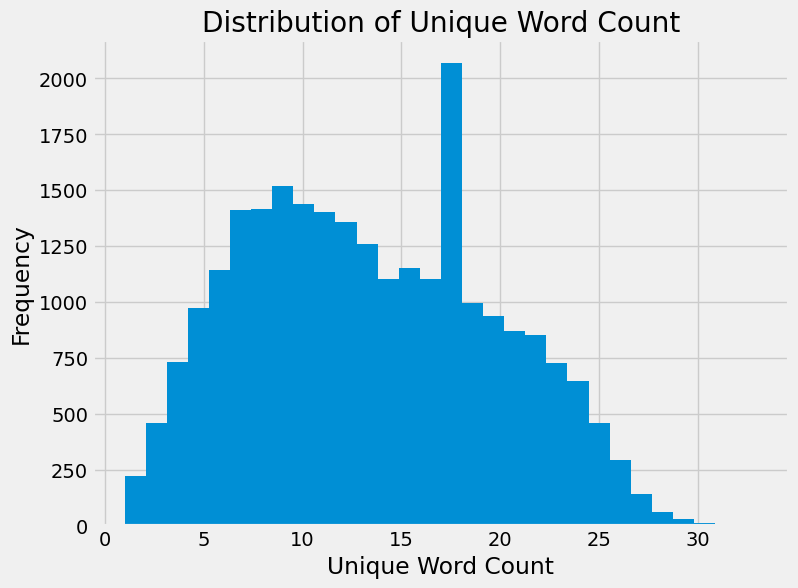

In [ ]:
# Plot distribution of unique word count
plt.figure(figsize=(8, 6))
plt.hist(data['unique_words'], bins=30)
plt.title('Distribution of Unique Word Count')
plt.xlabel('Unique Word Count')
plt.ylabel('Frequency');

### Top 20 most common words

In [ ]:
# Top 20 most common words
from collections import Counter
words = Counter(" ".join(data['tweet']).split()).most_common(20)
print("\nTop 20 most common words:")
print(words)


Top 20 most common words:
[('a', 9099), ('RT', 7539), ('bitch', 6638), ('the', 6590), ('I', 6472), ('to', 5240), ('you', 4881), ('and', 3670), ('that', 3111), ('my', 3072), ('in', 2902), ('is', 2759), ('bitches', 2576), ('like', 2534), ('of', 2503), ('on', 2361), ('be', 2304), ('me', 2249), ('for', 2023), ('hoes', 1925)]


### Visualizing top 20 most common words

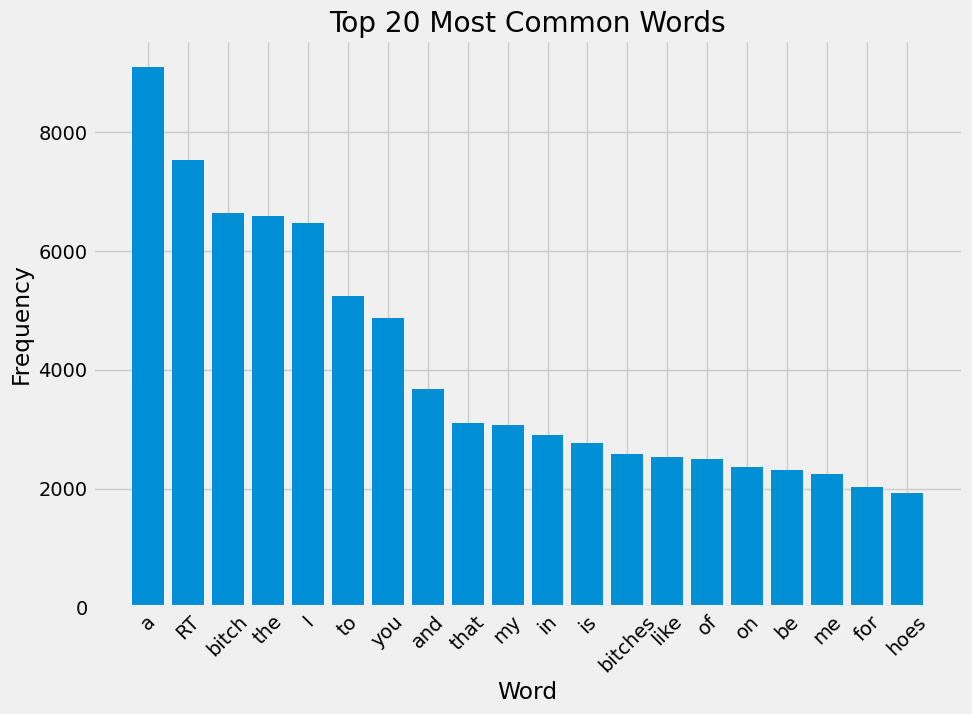

In [ ]:
# Plot top 20 most common words
plt.figure()
words_df = pd.DataFrame(words, columns=['Word', 'Frequency'])
plt.bar(words_df['Word'], words_df['Frequency'])
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45);

## Plot word cloud to visualize most common words

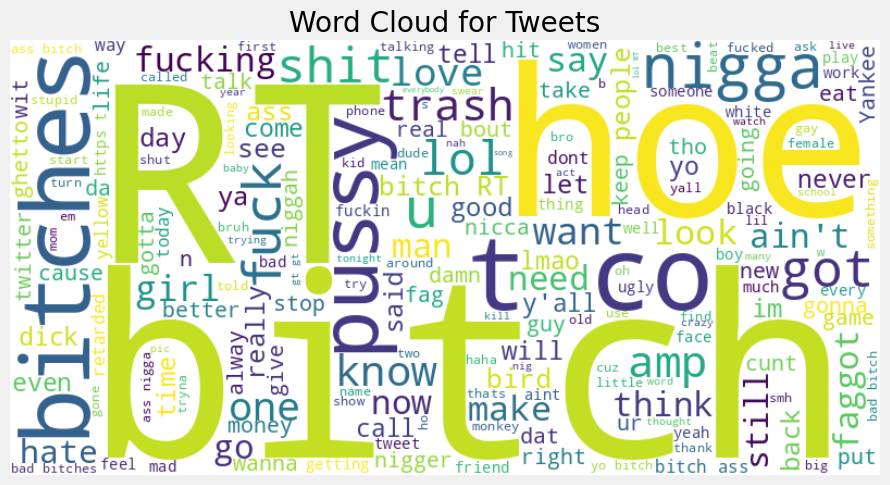

In [ ]:
from wordcloud import WordCloud

# Combine all tweets into a single string
text = " ".join(tweet for tweet in data['tweet'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Tweets')
plt.axis('off');

# Data cleaning and preprocessing

In [ ]:
# create data copy
cleaned_data = data.copy()
cleaned_data.head()

,count,hate_speech,offensive_language,neither,class,tweet,labels,word_count,unique_words
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,neither,25,23
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive_language,16,16
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive_language,21,19
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive_language,9,9
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive_language,26,23


In [ ]:
# remove special characters and urls
cleaned_data['tweet'] = cleaned_data['tweet'].str.replace(r'(@\S+)|(http\S+)|(&\S+)', '', regex=True)
print(cleaned_data['tweet'].iloc[:10])

0    !!! RT  As a woman you shouldn't complain abou...
1    !!!!! RT  boy dats cold...tyga dwn bad for cuf...
2    !!!!!!! RT  Dawg!!!! RT  You ever fuck a bitch...
3                !!!!!!!!! RT   she look like a tranny
4    !!!!!!!!!!!!! RT  The shit you hear about me m...
5    !!!!!!!!!!!!!!!!!!" The shit just blows me..cl...
6    !!!!!!" I can not just sit up and HATE on anot...
7    !!!! cause I'm tired of you big bitches coming...
8     "  you might not get ya bitch back  thats that "
9       "  :hobbies include: fighting Mariam"\n\nbitch
Name: tweet, dtype: object


In [ ]:
# spelling mistake correction
# import textblob

# def correct_spelling(text):
#   blob = textblob.TextBlob(text)
#   return str(blob.correct())

# cleaned_data['tweet'] = cleaned_data['tweet'].apply(correct_spelling)
# cleaned_data

# Tokenizing the text data

In [ ]:
# punctuations removal
import string
import re

cleaned_texts = list(cleaned_data.tweet)
def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  clean_text = text.translate(translator)
  return clean_text

all_texts = [remove_punctuation(i) for i in cleaned_texts]
print(all_texts[0])

 RT  As a woman you shouldnt complain about cleaning up your house  as a man you should always take the trash out


In [ ]:
# text data tokenization
import nltk
nltk.download('punkt')

all_texts_tokenized = [nltk.word_tokenize(t) for t in all_texts]
print(all_texts_tokenized[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['RT', 'As', 'a', 'woman', 'you', 'shouldnt', 'complain', 'about', 'cleaning', 'up', 'your', 'house', 'as', 'a', 'man', 'you', 'should', 'always', 'take', 'the', 'trash', 'out']


In [ ]:
# emoji detection
%pip install emoji

import emoji

all_texts_emoji_tokenized = [nltk.word_tokenize(emoji.demojize(t.lower(), language='en')) for t in all_texts]
print(all_texts_emoji_tokenized[0])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 3.3 MB/s eta 0:00:00
['rt', 'as', 'a', 'woman', 'you', 'shouldnt', 'complain', 'about', 'cleaning', 'up', 'your', 'house', 'as', 'a', 'man', 'you', 'should', 'always', 'take', 'the', 'trash', 'out']


In [ ]:
# stop words removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def remove_stopwords(text):
  filtered_words = [word for word in text if word not in stop_words]
  return filtered_words

filtered_texts = [remove_stopwords(i) for i in all_texts_emoji_tokenized]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

lemmatizer = WordNetLemmatizer()

lemma_text = []
for i in range(0,len(filtered_texts)):
  lemma_text.append([lemmatizer.lemmatize(t) for t in filtered_texts[i]])

cleaned_data['token'] = pd.DataFrame({'token': lemma_text})
cleaned_data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,count,hate_speech,offensive_language,neither,class,tweet,labels,word_count,unique_words,token
0,3,0,0,3,2,!!! RT As a woman you shouldn't complain abou...,neither,25,23,"[rt, woman, shouldnt, complain, cleaning, hous..."
1,3,0,3,0,1,!!!!! RT boy dats cold...tyga dwn bad for cuf...,offensive_language,16,16,"[rt, boy, dat, coldtyga, dwn, bad, cuffin, dat..."
2,3,0,3,0,1,!!!!!!! RT Dawg!!!! RT You ever fuck a bitch...,offensive_language,21,19,"[rt, dawg, rt, ever, fuck, bitch, start, cry, ..."
3,3,0,2,1,1,!!!!!!!!! RT she look like a tranny,offensive_language,9,9,"[rt, look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT The shit you hear about me m...,offensive_language,26,23,"[rt, shit, hear, might, true, might, faker, bi..."


In [ ]:
# Stemming (if necessary)
# from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()
# stem_texts = []
# for i in range(0,len(filtered_texts)):
#   stem_texts.append([stemmer.stem(t) for t in filtered_texts[i]])

# cleaned_data['token'] = pd.DataFrame({'token':stem_texts})
# cleaned_data.head(10)

# Preparing data for the model

## Text data and labels

In [ ]:
X = data.tweet.to_numpy()
y = data['class'].to_numpy()

X[:10], y[:10]

(array(["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
        '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
        '!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit',
        '!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny',
        '!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;',
        '!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"',
        '!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"',
        "!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;",

## Split the data into train and test sets
* Train set: 80%
* Test set: 20%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(f"""
--- Number of Train and Test records ---
Train set: {len(X_train)}
Test set: {len(X_test)}

Train labels: {len(y_train)}
Test labels: {len(y_test)}
""")


--- Number of Train and Test records ---
Train set: 19826
Test set: 4957

Train labels: 19826
Test labels: 4957



In [ ]:
train_df = pd.DataFrame({'tweet': X_train, 'label': y_train})
test_df = pd.DataFrame({'tweet': X_test, 'label': y_test})

train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

## Putting all the preprocessiong steps together

In [ ]:
# custom preprocessor
def preprocessor(text: str) -> str:
  text = text.lower()
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = re.sub(r'\d+', '', text)
  return text

In [ ]:
# custom tokenizer
def tokenizer(text: str) -> list[str]:
  tokens = word_tokenize(text)
  # tokens = word_tokenize(emoji.demojize(text, language='en'))
  # stop_words = set(stopwords.words('english'))
  # filtered_tokens = [word for word in tokens if word not in stop_words]

  # lemmatizer = WordNetLemmatizer()
  # lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

  return tokens

## Vectorizing the text data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Vectorizers' parameters
count_vectorizer_params = {
  'preprocessor': preprocessor,
  'tokenizer': tokenizer,
  'ngram_range': (1, 2),  # Unigrams and bigrams
  'max_features': 5000  # Limiting the number of features to 5000
}

tfidf_vectorizer_params = {
  'preprocessor': preprocessor,
  'tokenizer': tokenizer,
  'ngram_range': (1, 2),  # Unigrams and bigrams
  'max_features': 5000,  # Limiting the number of features to 5000
  'use_idf': True,  # Enable IDF
}

In [ ]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer(**count_vectorizer_params)

# Vectorize the text data using CountVectorizer
count_vectors = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [ ]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(**tfidf_vectorizer_params)

# Vectorize the text data using TF-IDF vectorizer
tfidf_vectors = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Print the shape of the vectorized data
print("Shape of CountVectorizer matrix:", count_vectors.shape)
print("Shape of TF-IDF matrix:", tfidf_vectors.shape)

Shape of CountVectorizer matrix: (19826, 5000)
Shape of TF-IDF matrix: (19826, 5000)


# Fit ML Model to the dataset

## Custom evaluation function

In [ ]:
# evaluation function
from sklearn.metrics import precision_recall_fscore_support
from typing import Any

def evaluate(y_true: Any, y_pred: Any) -> dict[str, float]:
  accuracy = sum(y_true == y_pred) / len(y_true)
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_true=y_true,
                                                                   y_pred=y_pred,
                                                                   average='weighted')
  return {'accuracy': round(accuracy*100, 2),
          'precision': round(precision*100, 2),
          'recall': round(recall*100, 2),
          'f1-score': round(f1_score*100, 2)}

## Fit the data to Logistic Regresssion model

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

logreg.fit(tfidf_vectors.toarray(), y_train)
logreg_test_preds = logreg.predict(X_test_tfidf.toarray())

# Evaluate the Logistic Regression classifier
train_score_logreg = evaluate(y_train, logreg.predict(tfidf_vectors.toarray()))
test_score_logreg = evaluate(y_test, logreg_test_preds)

CPU times: user 1min 41s, sys: 19 s, total: 2min
Wall time: 1min 43s


In [ ]:
# scores
print(f"""
--- Logistic Regression ---
Train Score: {train_score_logreg}
Test Score: {test_score_logreg}""")


--- Logistic Regression ---
Train Score: {'accuracy': 89.31, 'precision': 93.36, 'recall': 89.31, 'f1-score': 90.36}
Test Score: {'accuracy': 83.84, 'precision': 88.84, 'recall': 83.84, 'f1-score': 85.59}


## Fit the data to Multinomial naive bayes model

In [ ]:
%%time
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Initialize Multinomial Naive Bayes classifier
mnb_count = MultinomialNB()
mnb_tfidf = MultinomialNB()

# Fit the data to MultinomialNB using CountVectorizer
mnb_count.fit(count_vectors.toarray(), y_train)

# Fit the data to MultinomialNB using TF-IDF vectorizer
mnb_tfidf.fit(tfidf_vectors.toarray(), y_train)

# Predictions on validation data
count_test_preds_mnb = mnb_count.predict(X_test_count.toarray())
tfidf_test_preds_mnb = mnb_tfidf.predict(X_test_tfidf.toarray())

# Calculate training scores for MultinomialNB
train_score_count_mnb = evaluate(y_train, mnb_count.predict(count_vectors.toarray()))
train_score_tfidf_mnb = evaluate(y_train, mnb_tfidf.predict(tfidf_vectors.toarray()))

# Calculate validation scores for MultinomialNB
test_score_count_mnb = evaluate(y_test, count_test_preds_mnb)
test_score_tfidf_mnb = evaluate(y_test, tfidf_test_preds_mnb)

CPU times: user 6.47 s, sys: 3.22 s, total: 9.69 s
Wall time: 9.58 s


In [ ]:
# scores
print(f"""
--- MultinomialNB using CountVectorizer ---
Train Score: {train_score_count_mnb}
Test Score: {test_score_count_mnb}

--- MultinomialNB using TF-IDF ---
Train Score: {train_score_tfidf_mnb}
Test Score: {test_score_tfidf_mnb}""")


--- MultinomialNB using CountVectorizer ---
Train Score: {'accuracy': 90.05, 'precision': 90.29, 'recall': 90.05, 'f1-score': 90.14}
Test Score: {'accuracy': 87.94, 'precision': 87.44, 'recall': 87.94, 'f1-score': 87.66}

--- MultinomialNB using TF-IDF ---
Train Score: {'accuracy': 86.45, 'precision': 86.92, 'recall': 86.45, 'f1-score': 83.3}
Test Score: {'accuracy': 84.49, 'precision': 85.75, 'recall': 84.49, 'f1-score': 80.71}


## Fit the data to Bernoulli naive bayes model

In [ ]:
%%time
# Initialize Bernoulli Naive Bayes classifier
bnb_count = BernoulliNB()
bnb_tfidf = BernoulliNB()

# Fit the data to BernoulliNB using CountVectorizer
bnb_count.fit(count_vectors.toarray(), y_train)

# Fit the data to BernoulliNB using TF-IDF vectorizer
bnb_tfidf.fit(tfidf_vectors.toarray(), y_train)

# Predictions on validation data
count_test_preds_bnb = bnb_count.predict(X_test_count.toarray())
tfidf_test_preds_bnb = bnb_tfidf.predict(X_test_tfidf.toarray())

# Calculate training scores for BernoulliNB
train_score_count_bnb = evaluate(y_train, bnb_count.predict(count_vectors.toarray()))
train_score_tfidf_bnb = evaluate(y_train, bnb_count.predict(tfidf_vectors.toarray()))

# Calculate validation scores for BernoulliNB
test_score_count_bnb = evaluate(y_test, count_test_preds_bnb)
test_score_tfidf_bnb = evaluate(y_test, tfidf_test_preds_bnb)

CPU times: user 5.8 s, sys: 3.85 s, total: 9.64 s
Wall time: 8.79 s


In [ ]:
# scores
print(f"""
--- BernoulliNB using CountVectorizer ---
Train Score: {train_score_count_bnb}
Test Score: {test_score_count_bnb}

--- BernoulliNB using TF-IDF ---
Train Score: {train_score_tfidf_bnb}
Test Score: {test_score_tfidf_bnb}""")


--- BernoulliNB using CountVectorizer ---
Train Score: {'accuracy': 90.06, 'precision': 90.14, 'recall': 90.06, 'f1-score': 90.04}
Test Score: {'accuracy': 87.88, 'precision': 87.14, 'recall': 87.88, 'f1-score': 87.43}

--- BernoulliNB using TF-IDF ---
Train Score: {'accuracy': 90.06, 'precision': 90.14, 'recall': 90.06, 'f1-score': 90.04}
Test Score: {'accuracy': 87.88, 'precision': 87.14, 'recall': 87.88, 'f1-score': 87.43}


## Fit the data to SVM

In [ ]:
# %%time
# from sklearn.svm import SVC

# svm_classifier = SVC()
# svm_classifier.fit(tfidf_vectors.toarray(), y_train)

# # Predictions on test data
# svm_test_preds = svm_classifier.predict(X_test_tfidf.toarray())

# # Calculate training scores for the SVM classifier
# train_score_svm = evaluate(y_train, svm_classifier.predict(tfidf_vectors.toarray()))

# # Calculate validation scores for the SVM classifier
# test_score_svm = evaluate(y_test, svm_test_preds)

In [ ]:
# # scores
# print(f"""
# --- SVM ---
# Train Score: {train_score_svm}
# Test Score: {test_score_svm}""")

## Fit the data to Random Forest model

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(class_weight='balanced')
random_forest.fit(tfidf_vectors.toarray(), y_train)

# Predictions on test data
rf_test_preds = random_forest.predict(X_test_tfidf.toarray())

# Evaluate the Random Forest classifier
train_score_rf = evaluate(y_train, random_forest.predict(tfidf_vectors.toarray()))
test_score_rf = evaluate(y_test, rf_test_preds)

CPU times: user 1min 12s, sys: 1.89 s, total: 1min 13s
Wall time: 1min 16s


In [ ]:
# scores
print(f"""
--- Random Forest Classifier ---
Train Score: {train_score_rf}
Test Score: {test_score_rf}""")


--- Random Forest Classifier ---
Train Score: {'accuracy': 99.67, 'precision': 99.68, 'recall': 99.67, 'f1-score': 99.67}
Test Score: {'accuracy': 88.64, 'precision': 86.91, 'recall': 88.64, 'f1-score': 87.06}


# Cross validation

### Model Parameters

In [ ]:
# Define classifiers and their respective parameter grids
classifiers = {
  'Logistic Regression': (LogisticRegression(max_iter=1000, class_weight='balanced'), {
      'C': [0.1, 1, 10],
  }),
  'MultinomialNB': (MultinomialNB(), {
      'alpha': [0.1, 0.5, 1.0, 2.0],
      'fit_prior': [True, False]
  }),
  'BernoulliNB': (BernoulliNB(), {
      'alpha': [0.1, 0.5, 1.0, 2.0],
      'binarize': [0.0, 0.5, 1.0]
  }),
  # 'SVM': (SVC(), {
  #     'C': [0.1, 1, 10],
  #     'kernel': ['linear', 'rbf'],
  #     'gamma': ['scale', 'auto']
  # }),
  'Random Forest Classifier': (RandomForestClassifier(class_weight='balanced'), {
      'n_estimators': [200, 400, 600, 800],
      'max_depth': [10, 20, 30, 40]
  })
}

### Randomized Search

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Initialize KFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

trained_models = {}

for clf_name, (clf, param_grid) in classifiers.items():

  # cv_scores = []

  # Loop through each fold
  for train_index, val_index in kf.split(tfidf_vectors, y_train):
    # Split data into train and validation sets
    X_train_fold, X_val_fold = tfidf_vectors[train_index], tfidf_vectors[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Initialize GridSearchCV for each classifier
    random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv=kf,
                                       n_iter=10, scoring='f1_weighted', n_jobs=-1,
                                       error_score='raise')

    random_search.fit(X_train_fold, y_train_fold)
    best_estimator = random_search.best_estimator_
    # val_preds = best_estimator.predict(X_val_fold)

    # Calculate accuracy score on validation set
    # accuracy = np.mean(val_preds == y_val_fold)
    # cv_scores.append(accuracy)


  print(f'Randomized Search scores for {clf_name}:\n')
  means = random_search.cv_results_['mean_test_score']
  # std = random_search.cv_results_['std_test_score']

  for mean, param in zip(means, random_search.cv_results_['params']):
    print(f'Mean F1 score: {mean*100:.2f}% | Params: {param}')
  print(f'Best parameters: {random_search.best_params_}')
  print(f'Best score: {max(means)*100:.2f}%\n')

  # Save the best estimator
  trained_models[clf_name] = best_estimator

Randomized Search scores for Logistic Regression:

Mean F1 score: 84.83% | Params: {'C': 0.1}
Mean F1 score: 86.22% | Params: {'C': 1}
Mean F1 score: 86.11% | Params: {'C': 10}
Best parameters: {'C': 1}
Best score: 86.22%

Randomized Search scores for MultinomialNB:

Mean F1 score: 83.73% | Params: {'fit_prior': True, 'alpha': 0.1}
Mean F1 score: 82.73% | Params: {'fit_prior': False, 'alpha': 0.1}
Mean F1 score: 82.37% | Params: {'fit_prior': True, 'alpha': 0.5}
Mean F1 score: 83.03% | Params: {'fit_prior': False, 'alpha': 0.5}
Mean F1 score: 80.66% | Params: {'fit_prior': True, 'alpha': 1.0}
Mean F1 score: 84.53% | Params: {'fit_prior': False, 'alpha': 1.0}
Mean F1 score: 77.24% | Params: {'fit_prior': True, 'alpha': 2.0}
Mean F1 score: 85.71% | Params: {'fit_prior': False, 'alpha': 2.0}
Best parameters: {'fit_prior': False, 'alpha': 2.0}
Best score: 85.71%

Randomized Search scores for BernoulliNB:

Mean F1 score: 70.70% | Params: {'binarize': 0.5, 'alpha': 1.0}
Mean F1 score: 86.52%

In [ ]:
# rangom search test scores
cv_val_scores = {}
print('Test score:')
for clf_name, model in trained_models.items():
  model.fit(tfidf_vectors.toarray(), y_train)
  preds = model.predict(X_test_tfidf.toarray())
  score = evaluate(y_test, preds)
  cv_val_scores[clf_name] = score
  print(f'{clf_name}: {score}')

Test score:
Logistic Regression: {'accuracy': 83.84, 'precision': 88.84, 'recall': 83.84, 'f1-score': 85.59}
MultinomialNB: {'accuracy': 86.75, 'precision': 86.38, 'recall': 86.75, 'f1-score': 86.47}
BernoulliNB: {'accuracy': 87.55, 'precision': 87.67, 'recall': 87.55, 'f1-score': 87.6}
Random Forest Classifier: {'accuracy': 86.89, 'precision': 88.13, 'recall': 86.89, 'f1-score': 87.04}


## Trying out ensemble model

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [(k, v) for k, v in trained_models.items()]
final_estimator = LogisticRegression(max_iter=1000)

ensemble = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
ensemble.fit(tfidf_vectors.toarray(), y_train)
ensemble_preds = ensemble.predict(X_test_tfidf.toarray())

# Evaluate the Ensemble model
train_score_en = evaluate(y_train, ensemble.predict(tfidf_vectors.toarray()))
test_score_en = evaluate(y_test, ensemble_preds)

In [ ]:
# scores
print(f"""
--- Ensemble Model ---
Train Score: {train_score_en}
Test Score: {test_score_en}""")


--- Ensemble Model ---
Train Score: {'accuracy': 94.63, 'precision': 94.6, 'recall': 94.63, 'f1-score': 94.44}
Test Score: {'accuracy': 89.43, 'precision': 88.15, 'recall': 89.43, 'f1-score': 88.4}


# Experiment with Deep learning and LLM

## Prepare the data for deep learning model

### Word to index mapping

In [ ]:
X_train_clean = np.array([preprocessor(x) for x in X_train])
X_test_clean = np.array([preprocessor(x) for x in X_test])

In [ ]:
X_train_clean[:10]

array(['talking angela is a hoe', 'lol they tricking niccas left n right',
       ' bitches get stuff done ',
       'artalegaspare bitch i got the flameeee',
       'vivaalakatyy brotherbill jhuff good bitch choke',
       'i like saying the word pussy hoe ion no why',
       'this bitch forehead hairline who lied to her amp approved this shit  ',
       'mingtong you still are a cunt',
       'i feel bad for her nicca tho  ya girl a hoe my nicca',
       'log off nigger rt polokingbc relationshipgoals '], dtype='<U142')

In [ ]:
classes = ['hate_speech', 'offensive_language', 'neither']

In [ ]:
idx = 2
word2idx = {'<PAD>': 0, '<UNK>': 1}

for text in X_train_clean:
  tokens = text.split()
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = idx
      idx += 1

In [ ]:
len(word2idx)

29029

### Creating tokens and vectors

In [ ]:
train_sentences_int = []
for text in X_train_clean:
  tokens = text.split()
  sentence_int = [word2idx[token] for token in tokens]
  train_sentences_int.append(sentence_int)

In [ ]:
test_sentences_int = []
for text in X_test_clean:
  tokens = text.split()
  sentence_int = [word2idx[token] if token in word2idx else 1 for token in tokens]
  test_sentences_int.append(sentence_int)

In [ ]:
len(train_sentences_int), len(test_sentences_int)

(19826, 4957)

### Padding tokens to max length

In [ ]:
def padding(data: list[int], pad_first: bool=False) -> list[int]:
  max_len = np.max([len(x) for x in data])
  # print(f'Max length: {max_len}')
  for i in range(len(data)):
    x = data[i]
    pad = [0] * (max_len - len(x))
    if pad_first:
      data[i] = pad + x
    else:
      data[i] = x + pad
  return data

In [ ]:
train_data_pad = padding(data=train_sentences_int, pad_first=True)
test_data_pad = padding(data=test_sentences_int, pad_first=True)

## LSTM model with pretrained GloVe embeddings

In [ ]:
import torch
from torchtext.vocab import GloVe

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class LSTMModel(torch.nn.Module):
  def __init__(self, vocab_size: int, embed_dim: int,
               hidden_units: int, num_layers: int, bidirectional: bool,
               output_size: int, dropout: float=0.2) -> None:

    super(LSTMModel, self).__init__()
    global_vectors = GloVe(name='6B', dim=embed_dim)
    glove_weights = torch.load(f".vector_cache/glove.6B.{embed_dim}d.txt.pt")

    self.V = vocab_size
    self.D = embed_dim
    self.M = hidden_units
    self.L = num_layers
    self.K = output_size
    self.dropout = dropout
    self.bidirectional = bidirectional


    # self.embedding = torch.nn.Embedding(self.V, self.D, padding_idx=self.pad_idx)
    self.embedding = torch.nn.Embedding.from_pretrained(glove_weights[2])


    self.lstm = torch.nn.LSTM(input_size=self.D,
                              hidden_size=self.M,
                              num_layers=self.L,
                              dropout=self.dropout,
                              bidirectional=self.bidirectional,
                              batch_first=True)

    if self.bidirectional:
      self.fc_1 = torch.nn.Linear(in_features=self.M * 2,
                                out_features=self.M)
    else:
      self.fc_1 = torch.nn.Linear(in_features=self.M,
                                out_features=self.M)

    self.fc = torch.nn.Linear(in_features=self.M,
                              out_features=self.K)

    self.dropout = torch.nn.Dropout(self.dropout)

  def forward(self, X: torch.Tensor) -> torch.Tensor:

    if self.bidirectional:
      h0 = torch.zeros(self.L * 2, X.size(0), self.M).to(device)
      c0 = torch.zeros(self.L * 2, X.size(0), self.M).to(device)
    else:
      h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
      c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    embedded = self.embedding(X)
    output, _ = self.lstm(embedded, (h0, c0))
    output, _ = torch.max(output, 1)
    output = self.dropout(self.fc_1(output))
    return self.fc(output)

In [ ]:
lstm_model = LSTMModel(vocab_size=len(word2idx),
                       embed_dim=200,
                       hidden_units=64,
                       num_layers=2,
                       bidirectional=False,
                       output_size=len(classes)).to(device)
lstm_model

.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                           
100%|█████████▉| 399999/400000 [00:50<00:00, 7977.97it/s]


LSTMModel(
  (embedding): Embedding(400000, 200)
  (lstm): LSTM(200, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc_1): Linear(in_features=64, out_features=64, bias=True)
  (fc): Linear(in_features=64, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=lstm_model.parameters(), lr=1e-3)

### Model training loop

In [ ]:
def train(model: torch.nn.Module,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          train_loader: torch.utils.data.DataLoader,
          test_loader: torch.utils.data.DataLoader,
          epochs: int,
          device: torch.device):

  results = {
      'train_loss': [],
      'train_acc': [],
      'test_loss': [],
      'test_acc': []
  }

  for epoch in range(epochs):
    print(f'Epoch: {epoch+1}\n{"--"*20}')
    train_loss, train_acc = 0, 0
    model.train()
    for X, y in train_loader:
      X, y = X.to(device), y.to(device)
      # text, text_lengths = batch.text
      y_pred = model(X).squeeze()
      loss = loss_fn(y_pred, y.long())

      train_loss += loss.item()
      train_acc += (y_pred.argmax(dim=1) == y).sum().item()/len(y_pred)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    train_loss /= len(train_loader)
    train_acc /= len(train_loader)

    print(f'Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc*100:.2f}%')

    model.eval()
    with torch.inference_mode():
      test_loss, test_acc = 0, 0
      for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        # text, text_lengths = batch.text
        test_pred = model(X).squeeze()

        test_loss += loss_fn(test_pred, y.long()).item()
        test_acc += (test_pred.argmax(dim=1) == y).sum().item()/len(test_pred)

      test_loss /= len(test_loader)
      test_acc /= len(test_loader)

      print(f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc*100:.2f}%\n')

    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

  return results

### Dataset and Dataloader

In [ ]:
from typing import Any
from torch.utils.data import Dataset

class MakeDataset(Dataset):
  def __init__(self, sentence_int: Any, labels: Any) -> None:
    self.X = torch.tensor(sentence_int, dtype=torch.long)
    self.y = torch.tensor(labels, dtype=torch.float)

  def __len__(self) -> int:
    return len(self.y)

  def __getitem__(self, index: int) -> tuple[torch.Tensor, torch.Tensor]:
    return self.X[index], self.y[index]

In [ ]:
train_dataset = MakeDataset(sentence_int=train_data_pad, labels=y_train)
test_dataset = MakeDataset(sentence_int=test_data_pad, labels=y_test)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [ ]:
a, b = next(iter(train_loader))
a, b

(tensor([[   0,    0,    0,  ...,  361, 1840, 2391],
         [   0,    0,    0,  ..., 1201,    4,  186],
         [   0,    0,    0,  ...,    4,   86,   32],
         ...,
         [   0,    0,    0,  ...,    5,  165,   19],
         [   0,    0,    0,  ...,  238,    5,   32],
         [   0,    0,    0,  ...,  862,   58,   19]]),
 tensor([1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 0., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

### Training the model for 10 epochs

In [ ]:
%%time
lstm_results = train(lstm_model, loss_fn, optimizer, train_loader, test_loader, 10, device)

Epoch: 1
----------------------------------------
Train Loss: 0.5475 | Train Accuracy: 79.78%
Test Loss: 0.3990 | Test Accuracy: 84.16%

Epoch: 2
----------------------------------------
Train Loss: 0.3733 | Train Accuracy: 85.79%
Test Loss: 0.3599 | Test Accuracy: 86.82%

Epoch: 3
----------------------------------------
Train Loss: 0.3275 | Train Accuracy: 88.20%
Test Loss: 0.3221 | Test Accuracy: 88.70%

Epoch: 4
----------------------------------------
Train Loss: 0.2961 | Train Accuracy: 89.05%
Test Loss: 0.3269 | Test Accuracy: 87.63%

Epoch: 5
----------------------------------------
Train Loss: 0.2703 | Train Accuracy: 90.08%
Test Loss: 0.3236 | Test Accuracy: 88.07%

Epoch: 6
----------------------------------------
Train Loss: 0.2487 | Train Accuracy: 90.82%
Test Loss: 0.3171 | Test Accuracy: 88.25%

Epoch: 7
----------------------------------------
Train Loss: 0.2275 | Train Accuracy: 91.55%
Test Loss: 0.3315 | Test Accuracy: 88.22%

Epoch: 8
--------------------------------

### Plotting loss curves

In [ ]:
def plot_results(results: dict[str, float]) -> None:
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(results['train_loss'], label='Train Loss')
  plt.plot(results['test_loss'], label='Test Loss')
  plt.title('LSTM model: Loss & Accuracy')
  plt.legend()

  plt.subplot(2, 1, 2)
  plt.plot(results['train_acc'], label='Train Accuracy')
  plt.plot(results['test_acc'], label='Test Accuracy')
  plt.legend()
  plt.tight_layout()
  plt.xlabel('Number of Epochs')
  plt.show()

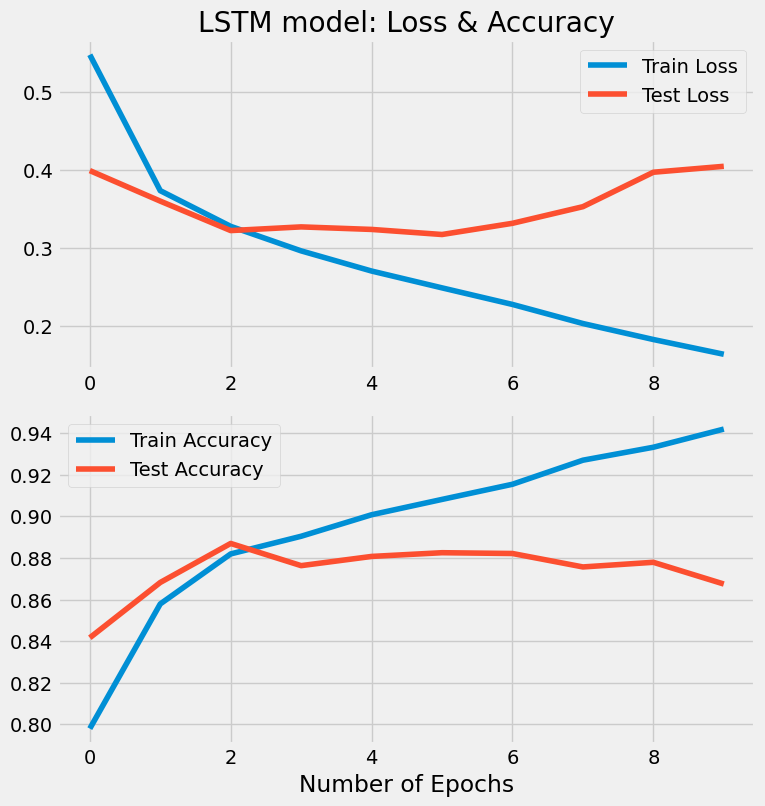

In [ ]:
plot_results(lstm_results)

In [ ]:
lstm_preds = []
lstm_model.eval()
with torch.inference_mode():
  for X, y in test_loader:
    X, y = X.to(device), y.to(device)
    # text, text_length = batch.text
    pred = lstm_model(X).squeeze()
    lstm_preds.append(pred.argmax(dim=-1))
lstm_preds = torch.cat(lstm_preds)

In [ ]:
lstm_preds

tensor([1, 2, 1,  ..., 2, 1, 1])

In [ ]:
lstm_score = evaluate(y_test, lstm_preds.cpu().numpy())
print(f'Test score for LSTM model: {lstm_score}')

Test score for LSTM model: {'accuracy': 86.75, 'precision': 85.28, 'recall': 86.75, 'f1-score': 85.82}


# Error Analysis

In [ ]:
model_results = pd.DataFrame({'logistic_regression': test_score_logreg,
                              'multinomialnb_count': test_score_count_mnb,
                              'multinomialnb_tfidf': test_score_tfidf_mnb,
                              'bernoulinb_count': test_score_count_bnb,
                              'bernoulinb_tfidf': test_score_tfidf_bnb,
                              'random_forest': test_score_rf,
                              'ensemble_model': test_score_en,
                              'lstm_model': lstm_score}).T
model_results

,accuracy,precision,recall,f1-score
logistic_regression,83.84,88.84,83.84,85.59
multinomialnb_count,87.94,87.44,87.94,87.66
multinomialnb_tfidf,84.49,85.75,84.49,80.71
bernoulinb_count,87.88,87.14,87.88,87.43
bernoulinb_tfidf,87.88,87.14,87.88,87.43
random_forest,88.64,86.91,88.64,87.06
ensemble_model,89.43,88.15,89.43,88.40
lstm_model,86.75,85.28,86.75,85.82


## Plotting modls' performance

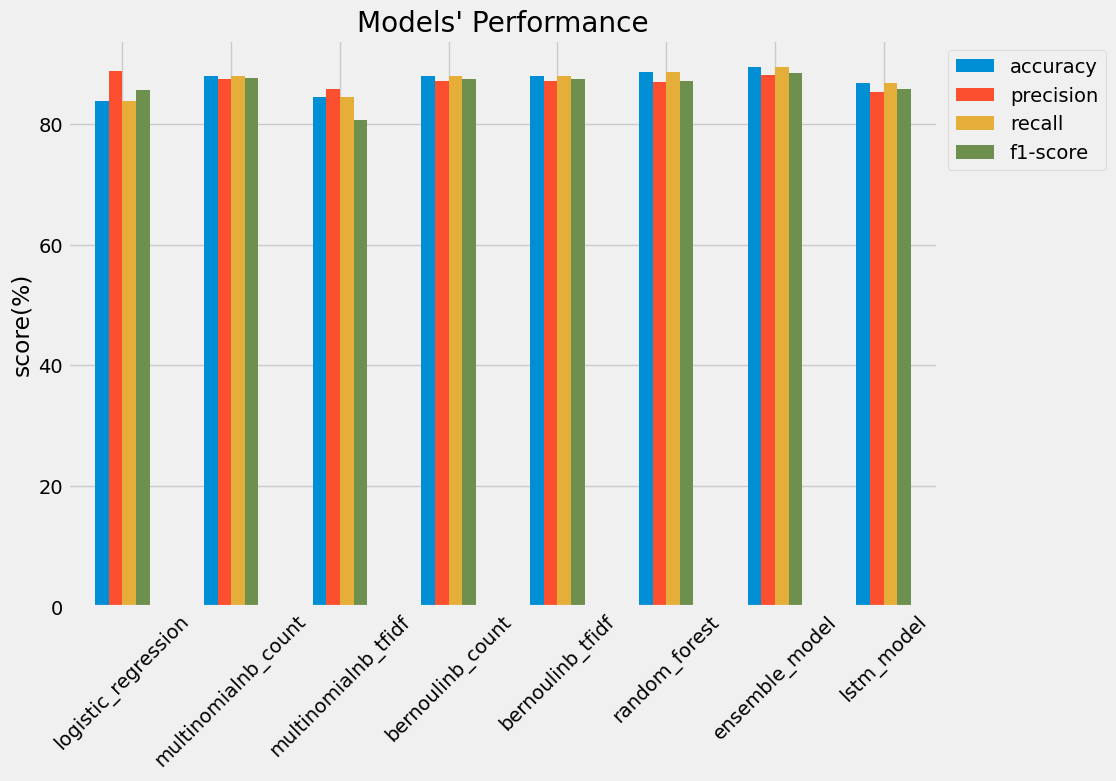

In [ ]:
model_results.plot(kind='bar', ylabel='score(%)', rot=45, title='Models\' Performance').legend(bbox_to_anchor=(1.0, 1.0));

## Choosing best model by the f1-scores

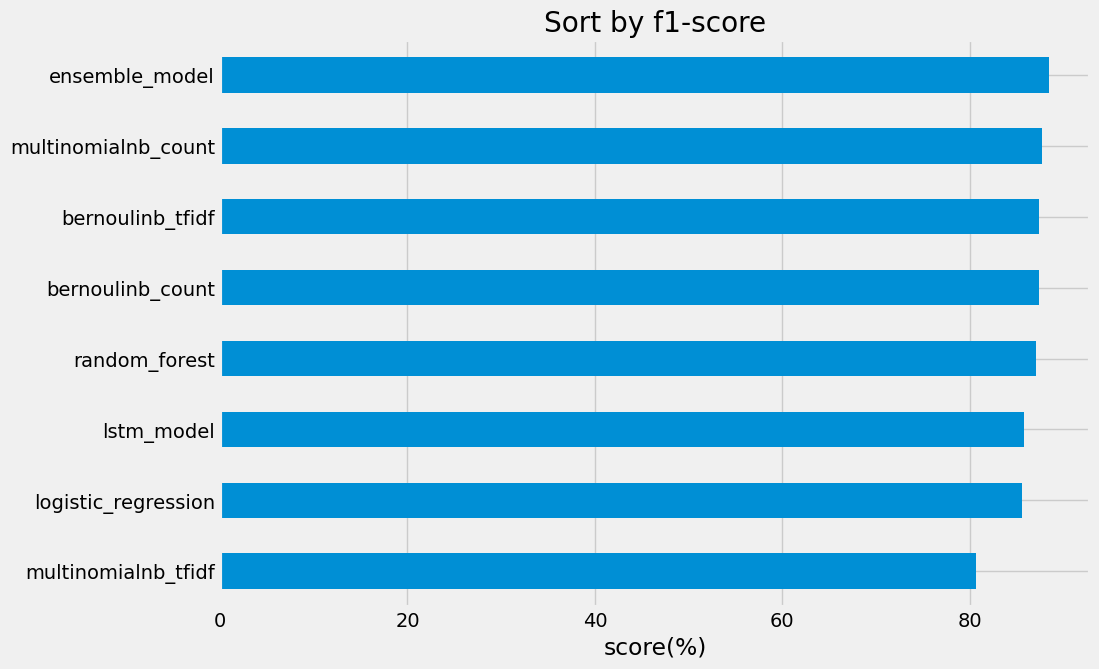

In [ ]:
model_results.sort_values('f1-score')['f1-score'].plot(kind='barh', title='Sort by f1-score', xlabel='score(%)');

## Ensemble model is the best performing model on the test data

### Plotting confusion matrix for the ensemble model

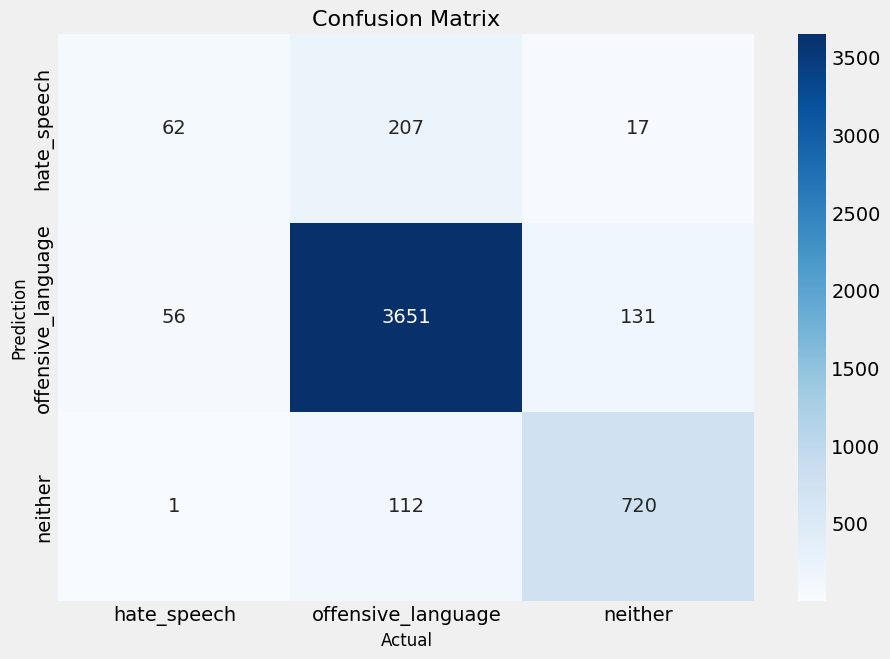

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, ensemble_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

### F1 score for each class

In [ ]:
from sklearn.metrics import classification_report

clf_dict = classification_report(y_test, ensemble_preds, output_dict=True, target_names=classes)
clf_dict

{'hate_speech': {'precision': 0.5210084033613446,
  'recall': 0.21678321678321677,
  'f1-score': 0.30617283950617286,
  'support': 286},
 'offensive_language': {'precision': 0.919647355163728,
  'recall': 0.9512767066180302,
  'f1-score': 0.9351946721311475,
  'support': 3838},
 'neither': {'precision': 0.8294930875576036,
  'recall': 0.8643457382953181,
  'f1-score': 0.8465608465608465,
  'support': 833},
 'accuracy': 0.8942909017550938,
 'macro avg': {'precision': 0.7567162820275587,
  'recall': 0.677468553898855,
  'f1-score': 0.695976119399389,
  'support': 4957},
 'weighted avg': {'precision': 0.881497416666374,
  'recall': 0.8942909017550938,
  'f1-score': 0.8840080227805718,
  'support': 4957}}

In [ ]:
f1_dict = {}
for k, v in clf_dict.items():
  if k == 'accuracy': break
  else:
    f1_dict[k] = v['f1-score']

f1_dict

{'hate_speech': 0.30617283950617286,
 'offensive_language': 0.9351946721311475,
 'neither': 0.8465608465608465}

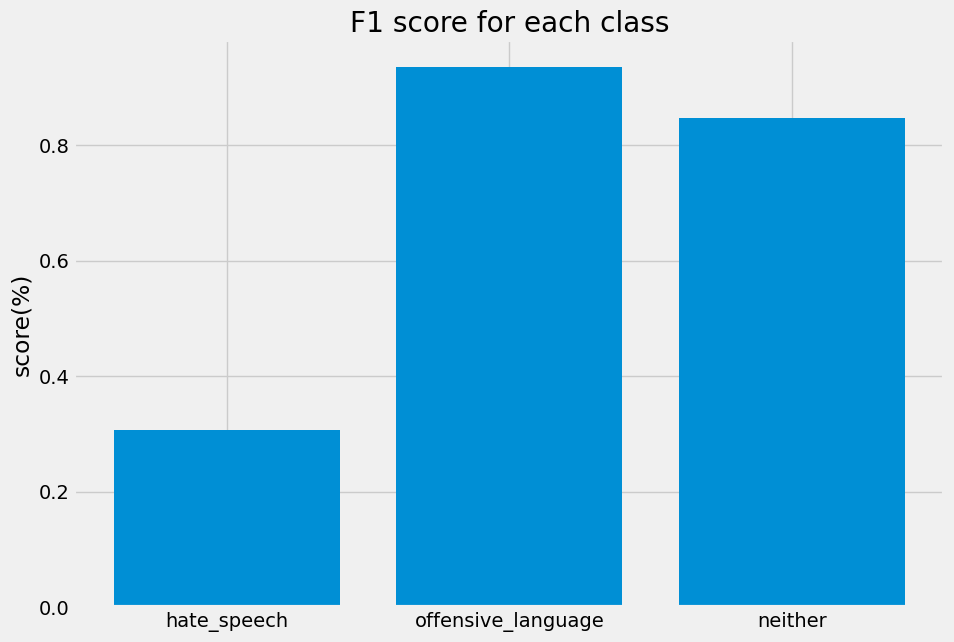

In [ ]:
plt.bar(f1_dict.keys(), f1_dict.values())
plt.title('F1 score for each class')
plt.ylabel('score(%)');

### Macro and Micro average scores

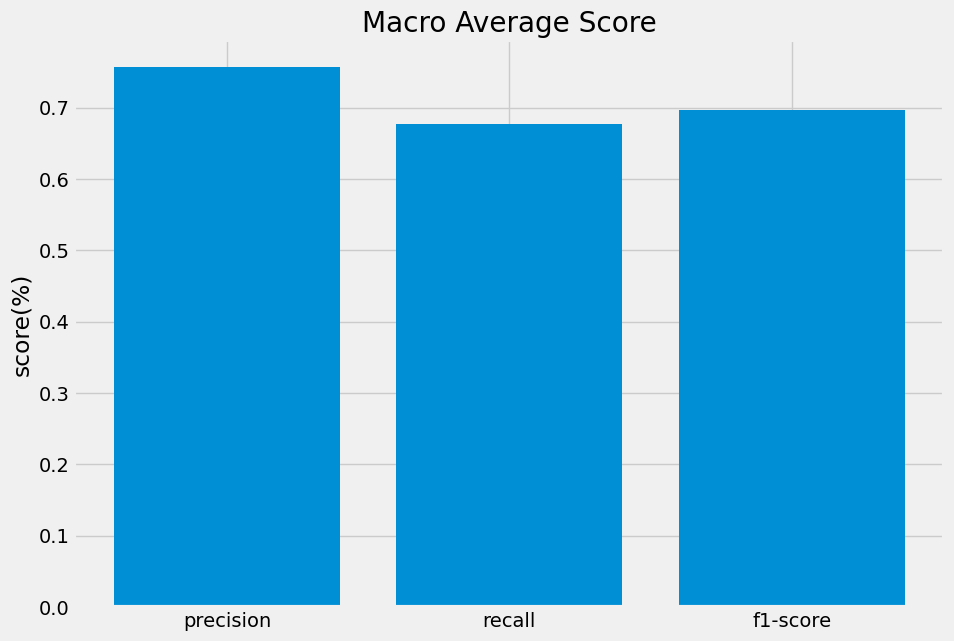

In [ ]:
macro_avg = clf_dict['macro avg']
del macro_avg['support']
plt.bar(macro_avg.keys(), macro_avg.values())
plt.title('Macro Average Score')
plt.ylabel('score(%)');

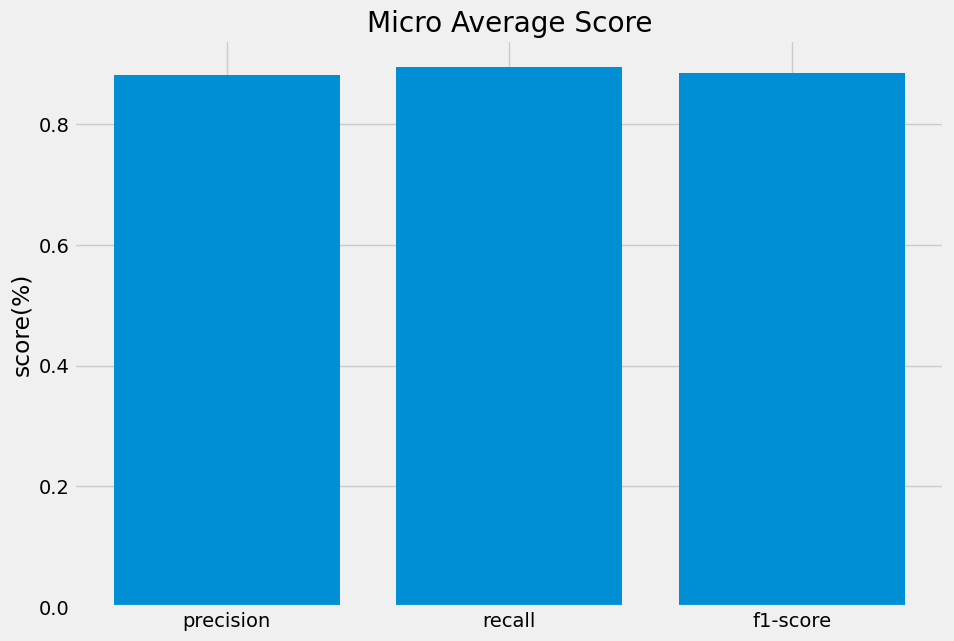

In [ ]:
micro_avg = clf_dict['weighted avg']
del micro_avg['support']
plt.bar(micro_avg.keys(), micro_avg.values())
plt.title('Micro Average Score')
plt.ylabel('score(%)');

### Find the most wrong results in test dataset


In [ ]:
ensemble_probs = np.max(ensemble.predict_proba(X_test_tfidf), axis=1)

In [ ]:
test_pred_df = pd.DataFrame({'tweet': X_test,
                             'true_label': y_test,
                             'pred_label': ensemble_preds,
                             'pred_prob': ensemble_probs,
                             'true_class': [classes[i] for i in y_test],
                             'pred_class': [classes[i] for i in ensemble_preds]})

test_pred_df

,tweet,true_label,pred_label,pred_prob,true_class,pred_class
0,RT @JimNorton: There is a GIFT SHOP at the 9-1...,1,1,0.789739,offensive_language,offensive_language
1,@Fabulousjonna_ I need some red green &amp; ye...,2,2,0.964946,neither,neither
2,this the one&#128076;RT @SumthinNueee hoes don...,1,1,0.965642,offensive_language,offensive_language
3,"""@lildurk_: I can turn yo bitch into a eaterrr...",1,1,0.969756,offensive_language,offensive_language
4,RT @LUNAraps: smh u got Ebola now RT&#8220;@Br...,1,1,0.970999,offensive_language,offensive_language
...,...,...,...,...,...,...
4952,Because of the message that sends to LGBTQ res...,1,2,0.560090,offensive_language,neither
4953,Bruh this niggah always falls asleep ! &#12853...,1,1,0.890795,offensive_language,offensive_language
4954,"""We're out here, and we're queer!""\n"" 2, 4, 6,...",0,1,0.619775,hate_speech,offensive_language
4955,RT @TooTurntNacho: Why give a bitch ya heart w...,1,1,0.986712,offensive_language,offensive_language


## Finding top 20 most wrong prediction (wrong predictions with high probability)

In [ ]:
test_pred_df[test_pred_df['true_label'] != test_pred_df['pred_label']].to_csv('wrong_preds.csv', index=False)

In [ ]:
most_wrong = test_pred_df[test_pred_df['true_label'] != test_pred_df['pred_label']].sort_values('pred_prob', ascending=False)
most_wrong.head(20)

,tweet,true_label,pred_label,pred_prob,true_class,pred_class
189,Lmao let these hoes be hoes ain't no Savin nem,0,1,0.991680,hate_speech,offensive_language
2747,RT @_iHATEMOON: All these bitches &amp; niggaz...,0,1,0.989366,hate_speech,offensive_language
1509,Black bitches don't be kickin up in our school...,0,1,0.988873,hate_speech,offensive_language
2634,@bonnoxxx haha bitch ima draw a webb in bullet...,0,1,0.988282,hate_speech,offensive_language
4880,"He ain't shit girl, &#128175;he a bitch made n...",0,1,0.987566,hate_speech,offensive_language
327,"RT ""@_ThatGAPeach: &amp; alla my niggas hot bo...",0,1,0.986541,hate_speech,offensive_language
4177,RT @dirtyimage: @Tronkitty not just cause of h...,0,1,0.985885,hate_speech,offensive_language
3407,RT @JHazeThaGod: You other niggas a call up a ...,0,1,0.985340,hate_speech,offensive_language
4590,It's so shady when you bitches talk to guys w/...,0,1,0.985332,hate_speech,offensive_language
1504,RT @_Cashhhhhh: Was deleting this pic until I ...,0,1,0.985162,hate_speech,offensive_language


In [ ]:
len(X_test), len(most_wrong)

(4957, 524)

## References

1. Scikit-learn. "sklearn.naive_bayes.MultinomialNB." Available at: [https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

2. Scikit-learn. "sklearn.model_selection.RandomizedSearchCV." Available at: [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

3. Pandey, Shubham. "Hyperparameter Tuning the Random Forest in Python using Scikit-Learn." Towards Data Science, 2019. Available at: [https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74).

4. Brownlee, Jason. "Stacking Ensemble Machine Learning with Python." Machine Learning Mastery, 2020. Available at: [https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/).

5. Pandey, Saurav. "Text Classification Using Custom Data and PyTorch." Medium, 2020. Available at: [https://medium.com/@spandey8312/text-classification-using-custom-data-and-pytorch-d88ba1087045](https://medium.com/@spandey8312/text-classification-using-custom-data-and-pytorch-d88ba1087045).

6. Kannan, Aiswarya. "Multiclass Text Classification Using LSTM in PyTorch." Towards Data Science, 2020. Available at: [https://towardsdatascience.com/multiclass-text-classification-using-lstm-in-pytorch-eac56baed8df](https://towardsdatascience.com/multiclass-text-classification-using-lstm-in-pytorch-eac56baed8df).